In [91]:
# Pandas for Everyone Read Along
# Part IV. Data Munging
# Created 11/24/20

%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import xlwt
import openpyxl
import numba
from datetime import datetime
import pandas_datareader as pdr
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import linear_model
from sklearn.cluster import KMeans

pd.options.mode.chained_assignment = None  # default='warn'

In [46]:
def diag(*args):
    for i in args:
        try:
            print(f'{"-"*5} Type: {type(i)}  Len: {len(i)}  {"-"*5}')
        except:
            print(f'{"-"*5} Type: {type(i)}  Len: N/A  {"-"*5}')
            
        try:
            display(i)
        except:
            print(f'{i}')

def diag_df(x):
    display(x.info())
    display(x)

d = diag
ddf = diag_df

In [47]:
tips = sns.load_dataset('tips')
ddf(tips)
# diag_df(tips)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.0 KB


None

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [11]:
model1 = smf.ols(formula='tip ~ total_bill', data=tips)
diag(model1)

----- Type: <class 'statsmodels.regression.linear_model.OLS'>  Len: N/A  -----


In [12]:
results1 = model1.fit()
diag(results1)
diag(results1.params)
diag(results1.conf_int())
diag(results1.summary())

----- Type: <class 'statsmodels.regression.linear_model.RegressionResultsWrapper'>  Len: N/A  -----


----- Type: <class 'pandas.core.series.Series'>  Len: 2  -----


Intercept     0.920270
total_bill    0.105025
dtype: float64

----- Type: <class 'pandas.core.frame.DataFrame'>  Len: 2  -----


,0,1
Intercept,0.605622,1.234918
total_bill,0.090517,0.119532


----- Type: <class 'statsmodels.iolib.summary.Summary'>  Len: N/A  -----


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Tue, 24 Nov 2020   Prob (F-statistic):           6.69e-34
Time:                        16:11:29   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9203      0.160      5.761      0.000       0.606       1.235
total_bill     0.1050      0.007     14.260      0.000       0.091       0.120
==============================================================================
Omnibus:                       20.185   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.750
Skew:                           0.443   Prob(JB):                     6.35e-09
Kurtosis:                       4.711   Cond. No.                         53.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
lr1 = linear_model.LinearRegression()

In [ ]:
tot_bill = tips['total_bill'].to_numpy()
tot_bill_2d = tot_bill.reshape(-1,1)
diag(tot_bill)
diag(tot_bill_2d)

In [8]:
predicted1 = lr1.fit(X=tot_bill_2d, y=tips['tip'])
diag(predicted1)

----- Type: <class 'sklearn.linear_model._base.LinearRegression'>  Len: N/A  -----


LinearRegression()

In [9]:
vars(predicted1)

{'fit_intercept': True,
 'normalize': False,
 'copy_X': True,
 'n_jobs': None,
 'n_features_in_': 1,
 'coef_': array([0.10502452]),
 '_residues': 252.78874385077603,
 'rank_': 1,
 'singular_': array([138.77486834]),
 'intercept_': 0.9202696135546731}

In [14]:
model2 = smf.ols(formula='tip ~ total_bill + size', data=tips)
diag(model2)

----- Type: <class 'statsmodels.regression.linear_model.OLS'>  Len: N/A  -----


In [15]:
results2 = model2.fit()
diag(results2)
diag(results2.params)
diag(results2.conf_int())
diag(results2.summary())

----- Type: <class 'statsmodels.regression.linear_model.RegressionResultsWrapper'>  Len: N/A  -----


----- Type: <class 'pandas.core.series.Series'>  Len: 3  -----


Intercept     0.668945
total_bill    0.092713
size          0.192598
dtype: float64

----- Type: <class 'pandas.core.frame.DataFrame'>  Len: 3  -----


,0,1
Intercept,0.287562,1.050327
total_bill,0.074759,0.110668
size,0.024540,0.360655


----- Type: <class 'statsmodels.iolib.summary.Summary'>  Len: N/A  -----


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     105.9
Date:                Tue, 24 Nov 2020   Prob (F-statistic):           9.67e-34
Time:                        16:12:12   Log-Likelihood:                -347.99
No. Observations:                 244   AIC:                             702.0
Df Residuals:                     241   BIC:                             712.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6689      0.194      3.455      0.001       0.288       1.050
total_bill     0.0927      0.009     10.172      0.000       0.075       0.111
size           0.1926      0.085      2.258      0.025       0.025       0.361
==============================================================================
Omnibus:                       24.753   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.169
Skew:                           0.545   Prob(JB):                     9.43e-11
Kurtosis:                       4.831   Cond. No.                         67.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
ddf(tips)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.0 KB


None

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [17]:
d(tips.sex)

----- Type: <class 'pandas.core.series.Series'>  Len: 244  -----


0      Female
1        Male
2        Male
3        Male
4      Female
        ...  
239      Male
240    Female
241      Male
242      Male
243    Female
Name: sex, Length: 244, dtype: category
Categories (2, object): ['Male', 'Female']

In [18]:
d(tips.sex.unique())

----- Type: <class 'pandas.core.arrays.categorical.Categorical'>  Len: 2  -----


['Female', 'Male']
Categories (2, object): ['Female', 'Male']

In [19]:
model3 = smf.ols(formula='tip ~ total_bill + size + sex + smoker + day + time', data=tips)
results3 = model3.fit()
diag(results3.summary())

----- Type: <class 'statsmodels.iolib.summary.Summary'>  Len: N/A  -----


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     26.06
Date:                Tue, 24 Nov 2020   Prob (F-statistic):           1.20e-28
Time:                        16:21:22   Log-Likelihood:                -347.48
No. Observations:                 244   AIC:                             713.0
Df Residuals:                     235   BIC:                             744.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.5908      0.256      2.310      0.022       0.087       1.095
sex[T.Female]      0.0324      0.142      0.229      0.819      -0.247       0.311
smoker[T.No]       0.0864      0.147      0.589      0.556      -0.202       0.375
day[T.Fri]         0.1623      0.393      0.412      0.680      -0.613       0.937
day[T.Sat]         0.0408      0.471      0.087      0.931      -0.886       0.968
day[T.Sun]         0.1368      0.472      0.290      0.772      -0.793       1.066
time[T.Dinner]    -0.0681      0.445     -0.153      0.878      -0.944       0.808
total_bill         0.0945      0.010      9.841      0.000       0.076       0.113
size               0.1760      0.090      1.966      0.051      -0.000       0.352
==============================================================================
Omnibus:                       27.860   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.555
Skew:                           0.607   Prob(JB):                     3.87e-12
Kurtosis:                       4.923   Cond. No.                         281.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
lr2 = linear_model.LinearRegression()
predicted2 = lr1.fit(X=tips[['total_bill', 'size']],
                     y=tips['tip'])
d(predicted2)
d(vars(predicted2))

----- Type: <class 'sklearn.linear_model._base.LinearRegression'>  Len: N/A  -----


LinearRegression()

----- Type: <class 'dict'>  Len: 10  -----


{'fit_intercept': True,
 'normalize': False,
 'copy_X': True,
 'n_jobs': None,
 'n_features_in_': 2,
 'coef_': array([0.09271334, 0.19259779]),
 '_residues': 247.55383696884684,
 'rank_': 2,
 'singular_': array([139.06017538,  11.8552638 ]),
 'intercept_': 0.6689447408125027}

In [21]:
tips_dummy = pd.get_dummies(tips[['total_bill', 'size', 'sex', 'smoker', 'day', 'time']])

In [22]:
d(_)

----- Type: <class 'dict'>  Len: 10  -----


{'fit_intercept': True,
 'normalize': False,
 'copy_X': True,
 'n_jobs': None,
 'n_features_in_': 2,
 'coef_': array([0.09271334, 0.19259779]),
 '_residues': 247.55383696884684,
 'rank_': 2,
 'singular_': array([139.06017538,  11.8552638 ]),
 'intercept_': 0.6689447408125027}

In [48]:
tips_dummy = pd.get_dummies(tips[['total_bill', 'size', 'sex', 'smoker', 'day', 'time']])
d(tips_dummy)

----- Type: <class 'pandas.core.frame.DataFrame'>  Len: 244  -----


,total_bill,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,2,0,1,0,1,0,0,0,1,0,1
1,10.34,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3,1,0,0,1,0,0,0,1,0,1
3,23.68,2,1,0,0,1,0,0,0,1,0,1
4,24.59,4,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,3,1,0,0,1,0,0,1,0,0,1
240,27.18,2,0,1,1,0,0,0,1,0,0,1
241,22.67,2,1,0,1,0,0,0,1,0,0,1
242,17.82,2,1,0,0,1,0,0,1,0,0,1


In [49]:
tips_dummy2 = pd.get_dummies(tips[['total_bill', 'size', 'sex', 'smoker', 'day', 'time']], drop_first=True)
d(tips_dummy2)

----- Type: <class 'pandas.core.frame.DataFrame'>  Len: 244  -----


,total_bill,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,2,1,1,0,0,1,1
1,10.34,3,0,1,0,0,1,1
2,21.01,3,0,1,0,0,1,1
3,23.68,2,0,1,0,0,1,1
4,24.59,4,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...
239,29.03,3,0,1,0,1,0,1
240,27.18,2,1,0,0,1,0,1
241,22.67,2,0,0,0,1,0,1
242,17.82,2,0,1,0,1,0,1


In [50]:
lr3 = linear_model.LinearRegression()
predicted3 = lr1.fit(X=tips_dummy2,
                     y=tips['tip'])
d(predicted3)
d(vars(predicted3))

----- Type: <class 'sklearn.linear_model._base.LinearRegression'>  Len: N/A  -----


LinearRegression()

----- Type: <class 'dict'>  Len: 10  -----


{'fit_intercept': True,
 'normalize': False,
 'copy_X': True,
 'n_jobs': None,
 'n_features_in_': 8,
 'coef_': array([ 0.09448701,  0.175992  ,  0.03244094,  0.08640832,  0.1622592 ,
         0.04080082,  0.13677854, -0.0681286 ]),
 '_residues': 246.52626893909152,
 'rank_': 8,
 'singular_': array([139.07579676,  12.26482924,   9.01043066,   8.73999535,
          7.12234199,   6.86255912,   4.16033227,   1.21655001]),
 'intercept_': 0.5908374259513764}

In [51]:
values3 = np.append(predicted3.intercept_, predicted3.coef_)
d(values3)

----- Type: <class 'numpy.ndarray'>  Len: 9  -----


array([ 0.59083743,  0.09448701,  0.175992  ,  0.03244094,  0.08640832,
        0.1622592 ,  0.04080082,  0.13677854, -0.0681286 ])

In [52]:
cols = tips_dummy2.columns
d(cols)
names3 = np.append('intercept', cols)
d(names3)

----- Type: <class 'pandas.core.indexes.base.Index'>  Len: 8  -----


Index(['total_bill', 'size', 'sex_Female', 'smoker_No', 'day_Fri', 'day_Sat',
       'day_Sun', 'time_Dinner'],
      dtype='object')

----- Type: <class 'numpy.ndarray'>  Len: 9  -----


array(['intercept', 'total_bill', 'size', 'sex_Female', 'smoker_No',
       'day_Fri', 'day_Sat', 'day_Sun', 'time_Dinner'], dtype=object)

In [54]:
results3 = pd.DataFrame(values3, index=names3, columns=['coef'] )
ddf(results3)

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, intercept to time_Dinner
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   coef    9 non-null      float64
dtypes: float64(1)
memory usage: 108.0+ bytes


None

,coef
intercept,0.590837
total_bill,0.094487
size,0.175992
sex_Female,0.032441
smoker_No,0.086408
day_Fri,0.162259
day_Sat,0.040801
day_Sun,0.136779
time_Dinner,-0.068129


In [55]:
acs = pd.read_csv('book_resources/data/acs_ny.csv')
ddf(acs)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22745 entries, 0 to 22744
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Acres         22745 non-null  object
 1   FamilyIncome  22745 non-null  int64 
 2   FamilyType    22745 non-null  object
 3   NumBedrooms   22745 non-null  int64 
 4   NumChildren   22745 non-null  int64 
 5   NumPeople     22745 non-null  int64 
 6   NumRooms      22745 non-null  int64 
 7   NumUnits      22745 non-null  object
 8   NumVehicles   22745 non-null  int64 
 9   NumWorkers    22745 non-null  int64 
 10  OwnRent       22745 non-null  object
 11  YearBuilt     22745 non-null  object
 12  HouseCosts    22745 non-null  int64 
 13  ElectricBill  22745 non-null  int64 
 14  FoodStamp     22745 non-null  object
 15  HeatingFuel   22745 non-null  object
 16  Insurance     22745 non-null  int64 
 17  Language      22745 non-null  object
dtypes: int64(10), object(8)
memory usage: 2.4+ MB


None

,Acres,FamilyIncome,FamilyType,NumBedrooms,NumChildren,NumPeople,NumRooms,NumUnits,NumVehicles,NumWorkers,OwnRent,YearBuilt,HouseCosts,ElectricBill,FoodStamp,HeatingFuel,Insurance,Language
0,1-10,150,Married,4,1,3,9,Single detached,1,0,Mortgage,1950-1959,1800,90,No,Gas,2500,English
1,1-10,180,Female Head,3,2,4,6,Single detached,2,0,Rented,Before 1939,850,90,No,Oil,0,English
2,1-10,280,Female Head,4,0,2,8,Single detached,3,1,Mortgage,2000-2004,2600,260,No,Oil,6600,Other European
3,1-10,330,Female Head,2,1,2,4,Single detached,1,0,Rented,1950-1959,1800,140,No,Oil,0,English
4,1-10,330,Male Head,3,1,2,5,Single attached,1,0,Mortgage,Before 1939,860,150,No,Gas,660,Spanish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22740,10+,565000,Married,5,3,5,10,Single detached,2,2,Mortgage,1990-1999,1700,370,No,Gas,1000,English
22741,10+,599000,Married,4,0,2,6,Single detached,2,2,Mortgage,Before 1939,1300,100,No,Gas,3500,English
22742,10+,611700,Married,4,1,5,9,Single detached,5,3,Mortgage,Before 1939,410,100,No,Oil,1300,Spanish
22743,10+,621430,Married,3,2,4,11,Single detached,2,3,Mortgage,1970-1979,1600,80,No,Gas,800,Spanish


In [56]:
acs['Acres'].unique()

array(['1-10', 'Sub 1', '10+'], dtype=object)

In [59]:
acs['ge150k'] = pd.cut(acs['FamilyIncome'], [0, 150000, acs['FamilyIncome'].max()], labels=[0, 1])
acs['ge150k_i'] = acs['ge150k'].astype(int)
ddf(acs)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22745 entries, 0 to 22744
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Acres         22745 non-null  object  
 1   FamilyIncome  22745 non-null  int64   
 2   FamilyType    22745 non-null  object  
 3   NumBedrooms   22745 non-null  int64   
 4   NumChildren   22745 non-null  int64   
 5   NumPeople     22745 non-null  int64   
 6   NumRooms      22745 non-null  int64   
 7   NumUnits      22745 non-null  object  
 8   NumVehicles   22745 non-null  int64   
 9   NumWorkers    22745 non-null  int64   
 10  OwnRent       22745 non-null  object  
 11  YearBuilt     22745 non-null  object  
 12  HouseCosts    22745 non-null  int64   
 13  ElectricBill  22745 non-null  int64   
 14  FoodStamp     22745 non-null  object  
 15  HeatingFuel   22745 non-null  object  
 16  Insurance     22745 non-null  int64   
 17  Language      22745 non-null  object  
 18  ge150k

None

,Acres,FamilyIncome,FamilyType,NumBedrooms,NumChildren,NumPeople,NumRooms,NumUnits,NumVehicles,NumWorkers,OwnRent,YearBuilt,HouseCosts,ElectricBill,FoodStamp,HeatingFuel,Insurance,Language,ge150k,ge150k_i
0,1-10,150,Married,4,1,3,9,Single detached,1,0,Mortgage,1950-1959,1800,90,No,Gas,2500,English,0,0
1,1-10,180,Female Head,3,2,4,6,Single detached,2,0,Rented,Before 1939,850,90,No,Oil,0,English,0,0
2,1-10,280,Female Head,4,0,2,8,Single detached,3,1,Mortgage,2000-2004,2600,260,No,Oil,6600,Other European,0,0
3,1-10,330,Female Head,2,1,2,4,Single detached,1,0,Rented,1950-1959,1800,140,No,Oil,0,English,0,0
4,1-10,330,Male Head,3,1,2,5,Single attached,1,0,Mortgage,Before 1939,860,150,No,Gas,660,Spanish,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22740,10+,565000,Married,5,3,5,10,Single detached,2,2,Mortgage,1990-1999,1700,370,No,Gas,1000,English,1,1
22741,10+,599000,Married,4,0,2,6,Single detached,2,2,Mortgage,Before 1939,1300,100,No,Gas,3500,English,1,1
22742,10+,611700,Married,4,1,5,9,Single detached,5,3,Mortgage,Before 1939,410,100,No,Oil,1300,Spanish,1,1
22743,10+,621430,Married,3,2,4,11,Single detached,2,3,Mortgage,1970-1979,1600,80,No,Gas,800,Spanish,1,1


In [64]:
import statsmodels.formula.api as smf
model = smf.logit('ge150k_i ~ HouseCosts + NumWorkers + OwnRent + NumBedrooms + FamilyType',
                 data=acs)
results = model.fit()
d(results.summary())

Optimization terminated successfully.
         Current function value: 0.391651
         Iterations 7
----- Type: <class 'statsmodels.iolib.summary.Summary'>  Len: N/A  -----


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               ge150k_i   No. Observations:                22745
Model:                          Logit   Df Residuals:                    22737
Method:                           MLE   Df Model:                            7
Date:                Tue, 24 Nov 2020   Pseudo R-squ.:                  0.2078
Time:                        17:16:41   Log-Likelihood:                -8908.1
converged:                       True   LL-Null:                       -11244.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -5.8081      0.120    -48.456      0.000      -6.043      -5.573
OwnRent[T.Outright]         1.8276      0.208      8.782      0.000       1.420       2.236
OwnRent[T.Rented]          -0.8763      0.101     -8.647      0.000      -1.075      -0.678
FamilyType[T.Male Head]     0.2874      0.150      1.913      0.056      -0.007       0.582
FamilyType[T.Married]       1.3877      0.088     15.781      0.000       1.215       1.560
HouseCosts                  0.0007   1.72e-05     42.453      0.000       0.001       0.001
NumWorkers                  0.5873      0.026     22.393      0.000       0.536       0.639
NumBedrooms                 0.2365      0.017     13.985      0.000       0.203       0.270
===========================================================================================
"""

In [65]:
ods_ratio = np.exp(results.params)
d(ods_ratio)

----- Type: <class 'pandas.core.series.Series'>  Len: 8  -----


Intercept                  0.003003
OwnRent[T.Outright]        6.219147
OwnRent[T.Rented]          0.416310
FamilyType[T.Male Head]    1.332901
FamilyType[T.Married]      4.005636
HouseCosts                 1.000731
NumWorkers                 1.799117
NumBedrooms                1.266852
dtype: float64

In [66]:
housing = pd.read_csv('book_resources/data/housing_renamed.csv')
ddf(housing)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2626 entries, 0 to 2625
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   neighborhood       2626 non-null   object 
 1   type               2626 non-null   object 
 2   units              2626 non-null   int64  
 3   year_built         2530 non-null   float64
 4   sq_ft              2626 non-null   int64  
 5   income             2626 non-null   int64  
 6   income_per_sq_ft   2626 non-null   float64
 7   expense            2626 non-null   int64  
 8   expense_per_sq_ft  2626 non-null   float64
 9   net_income         2626 non-null   int64  
 10  value              2626 non-null   int64  
 11  value_per_sq_ft    2626 non-null   float64
 12  boro               2626 non-null   object 
dtypes: float64(4), int64(6), object(3)
memory usage: 236.0+ KB


None

,neighborhood,type,units,year_built,sq_ft,income,income_per_sq_ft,expense,expense_per_sq_ft,net_income,value,value_per_sq_ft,boro
0,FINANCIAL,R9-CONDOMINIUM,42,1920.0,36500,1332615,36.51,342005,9.37,990610,7300000,200.00,Manhattan
1,FINANCIAL,R4-CONDOMINIUM,78,1985.0,126420,6633257,52.47,1762295,13.94,4870962,30690000,242.76,Manhattan
2,FINANCIAL,RR-CONDOMINIUM,500,NaN,554174,17310000,31.24,3543000,6.39,13767000,90970000,164.15,Manhattan
3,FINANCIAL,R4-CONDOMINIUM,282,1930.0,249076,11776313,47.28,2784670,11.18,8991643,67556006,271.23,Manhattan
4,TRIBECA,R4-CONDOMINIUM,239,1985.0,219495,10004582,45.58,2783197,12.68,7221385,54320996,247.48,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2621,ROSEBANK,R4-CONDOMINIUM,52,NaN,62391,831672,13.33,326305,5.23,505367,3354003,53.76,Staten Island
2622,ARROCHAR-SHORE ACRES,R4-CONDOMINIUM,102,1987.0,90618,1274089,14.06,637045,7.03,637044,5233000,57.75,Staten Island
2623,GRANT CITY,R4-CONDOMINIUM,100,1986.0,78903,1321625,16.75,673832,8.54,647793,4687000,59.40,Staten Island
2624,GRANT CITY,R4-CONDOMINIUM,159,1961.0,166712,2343971,14.06,1171985,7.03,1171986,5967531,35.80,Staten Island


In [68]:
house1 = smf.glm('value_per_sq_ft ~ units + sq_ft + boro', data= housing).fit()
d(house1.summary())

----- Type: <class 'statsmodels.iolib.summary.Summary'>  Len: N/A  -----


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        value_per_sq_ft   No. Observations:                 2626
Model:                            GLM   Df Residuals:                     2619
Model Family:                Gaussian   Df Model:                            6
Link Function:               identity   Scale:                          1879.5
Method:                          IRLS   Log-Likelihood:                -13621.
Date:                Tue, 24 Nov 2020   Deviance:                   4.9224e+06
Time:                        17:41:33   Pearson chi2:                 4.92e+06
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                43.2909      5.330      8.122      0.000      32.845      53.737
boro[T.Brooklyn]         34.5621      5.535      6.244      0.000      23.714      45.411
boro[T.Manhattan]       130.9924      5.385     24.327      0.000     120.439     141.546
boro[T.Queens]           32.9937      5.663      5.827      0.000      21.895      44.092
boro[T.Staten Island]    -3.6303      9.993     -0.363      0.716     -23.216      15.956
units                    -0.1881      0.022     -8.511      0.000      -0.231      -0.145
sq_ft                     0.0002   2.09e-05     10.079      0.000       0.000       0.000
=========================================================================================
"""

<IPython.core.display.Javascript object>


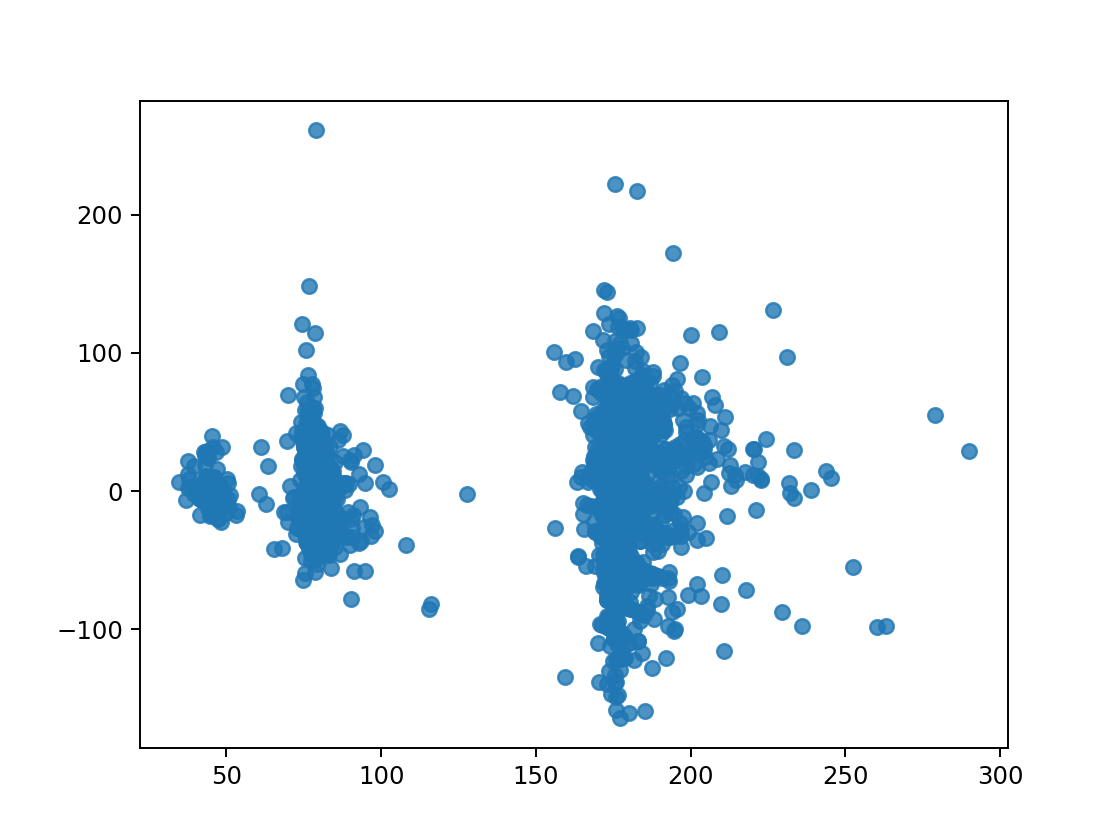

<AxesSubplot:>

In [70]:
fig1, ax1 = plt.subplots()
sns.regplot(x=house1.fittedvalues,
            y=house1.resid_deviance, 
            fit_reg=False, 
            ax=ax1)

In [73]:
res_df = pd.DataFrame({'fittedvalues': house1.fittedvalues,
                      'resid_deviance': house1.resid_deviance, 
                      'boro':housing['boro']})
ddf(res_df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2626 entries, 0 to 2625
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fittedvalues    2626 non-null   float64
 1   resid_deviance  2626 non-null   float64
 2   boro            2626 non-null   object 
dtypes: float64(2), object(1)
memory usage: 71.8+ KB


None

,fittedvalues,resid_deviance,boro
0,174.059177,25.940823,Manhattan
1,186.199265,56.560735,Manhattan
2,196.781144,-32.631144,Manhattan
3,173.621149,97.608851,Manhattan
4,175.488537,71.991463,Manhattan
...,...,...,...
2621,43.000881,10.759119,Staten Island
2622,39.531911,18.218089,Staten Island
2623,37.444209,21.955791,Staten Island
2624,44.813659,-9.013659,Staten Island


<IPython.core.display.Javascript object>


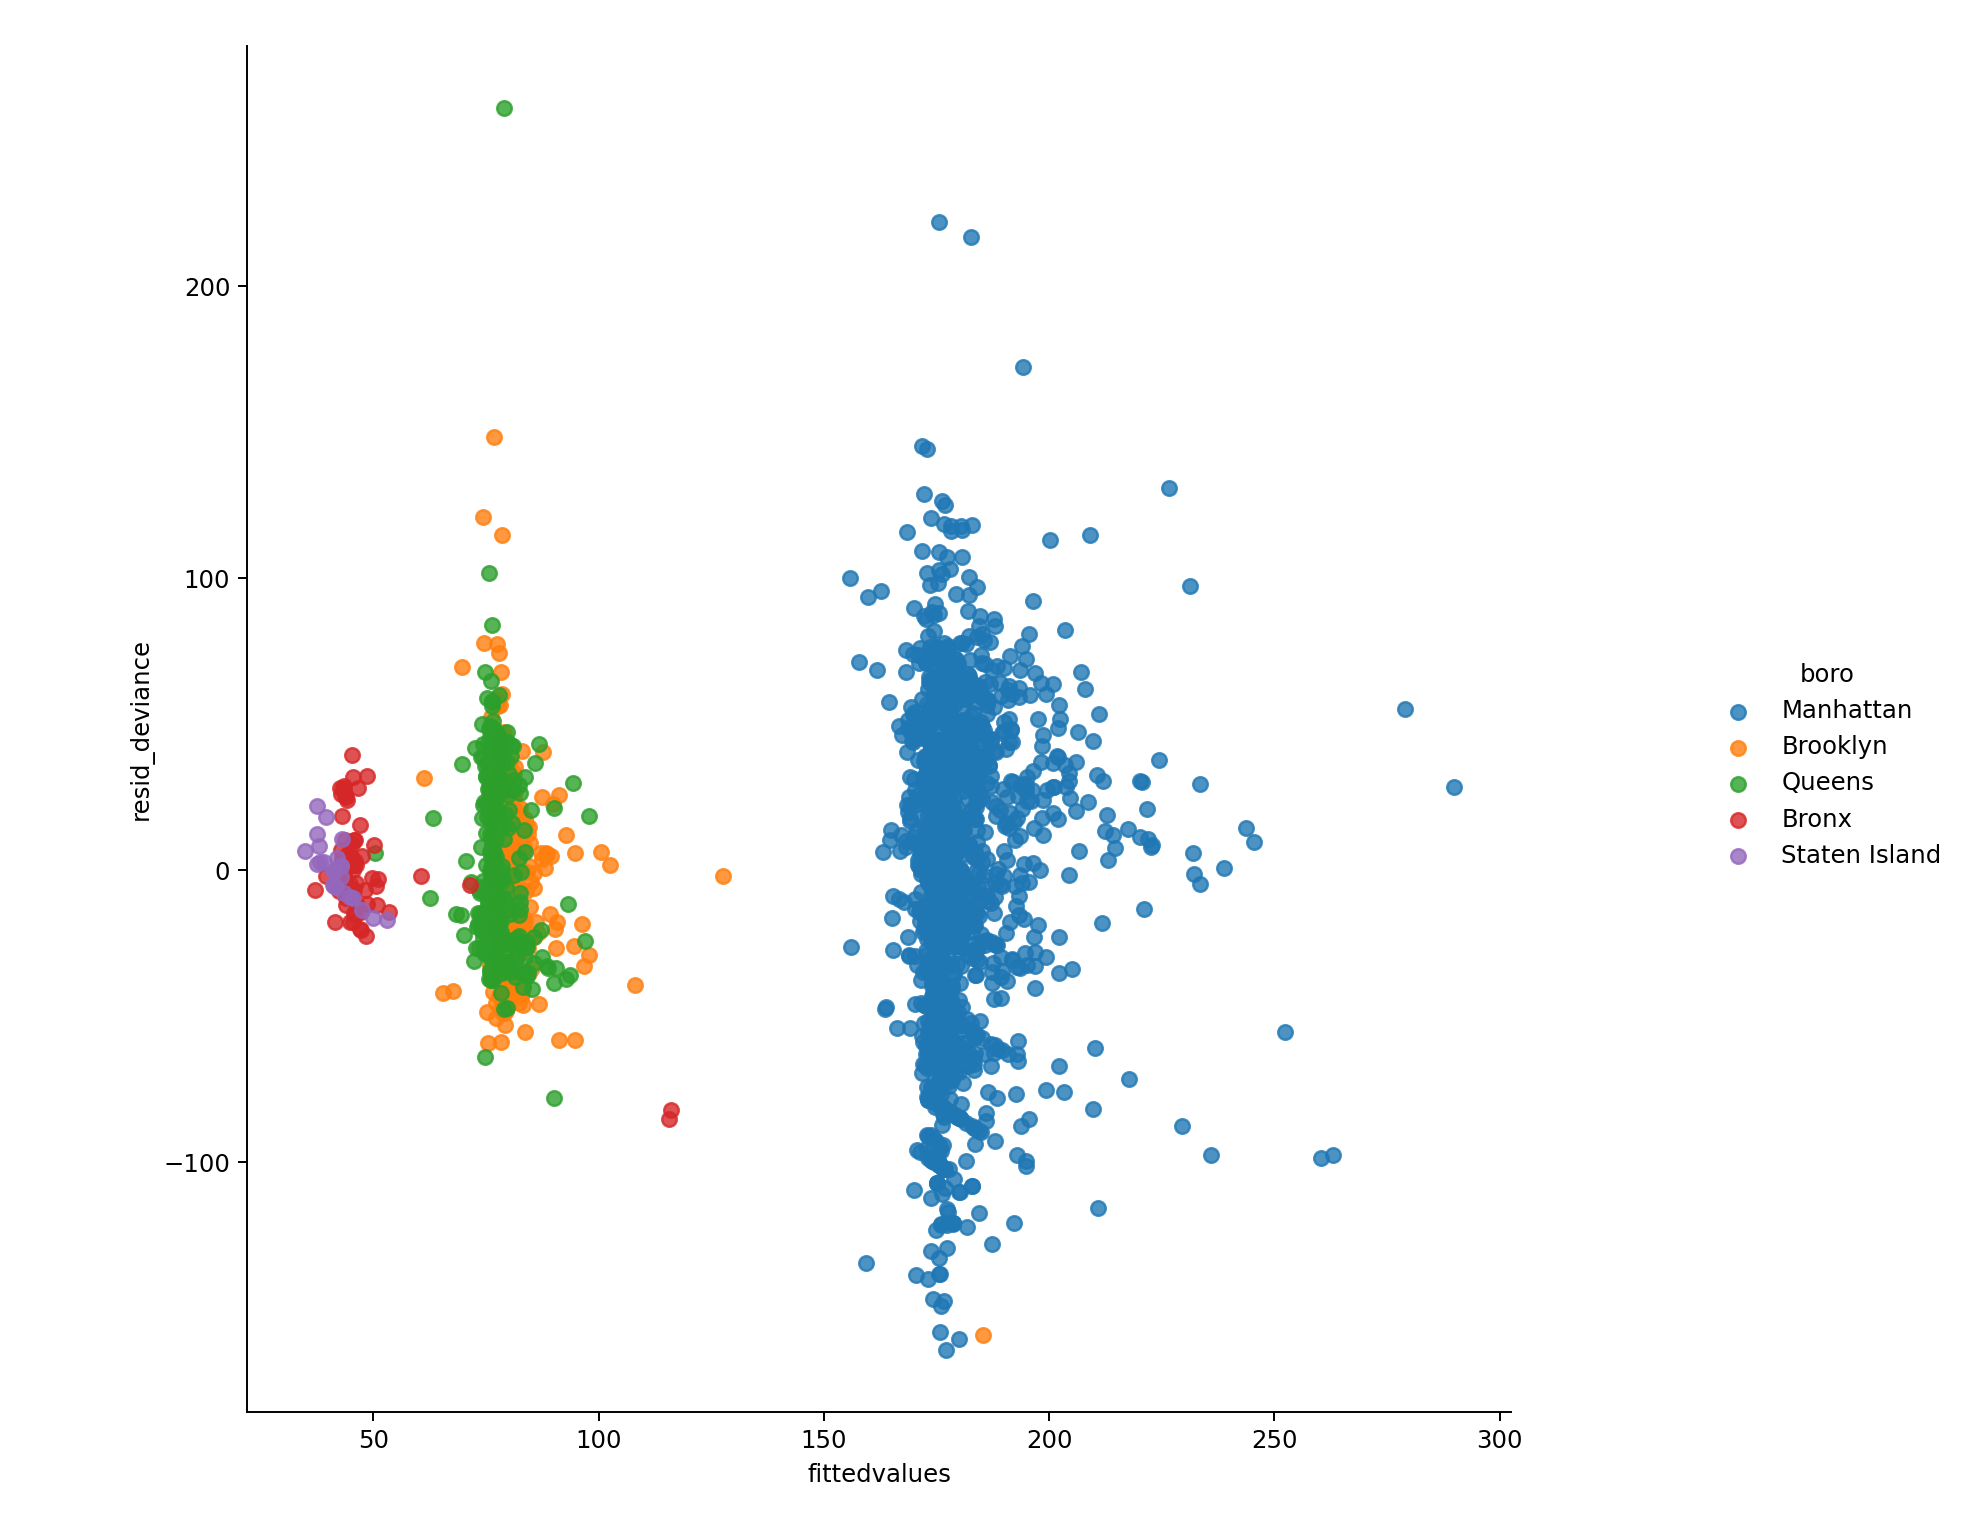

In [77]:
fig2 = sns.lmplot(x='fittedvalues',
            y='resid_deviance', 
            hue='boro',
            data=res_df,
            fit_reg=False)

<IPython.core.display.Javascript object>


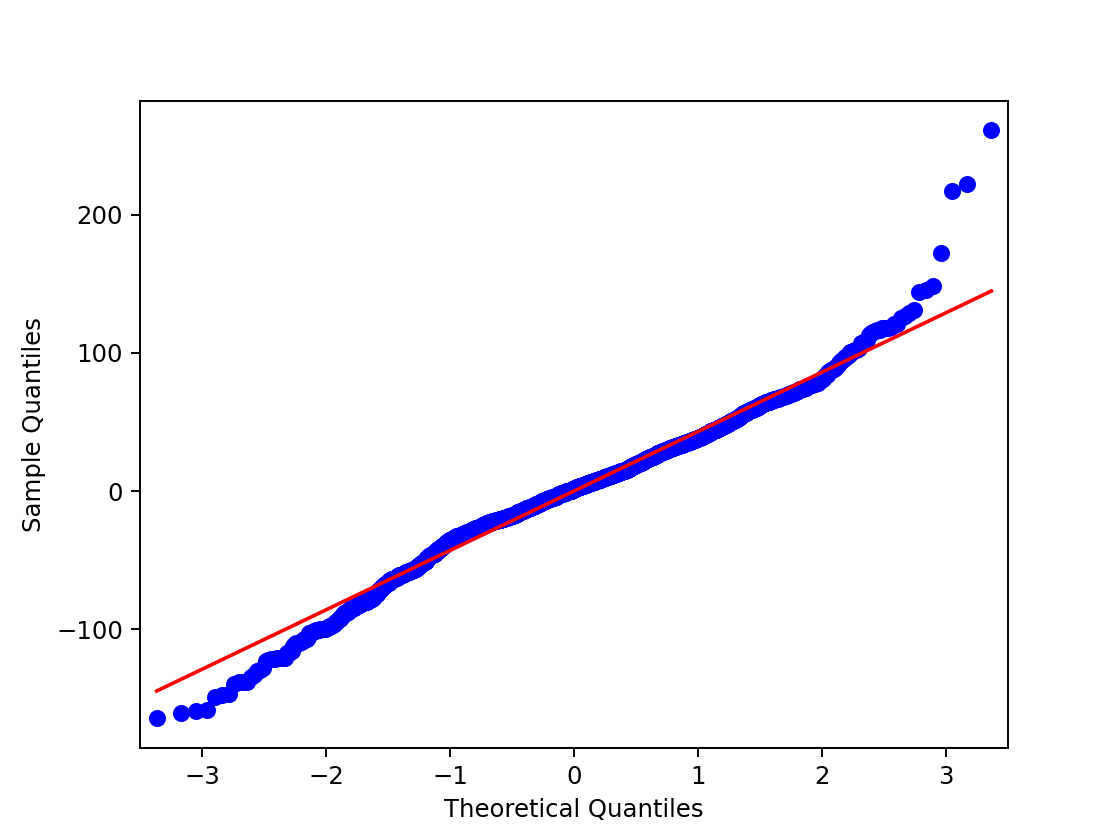

In [78]:
from scipy import stats

resid = house1.resid_deviance.copy()
resid_std = stats.zscore(resid)

fig = statsmodels.graphics.gofplots.qqplot(resid, line='r')

<IPython.core.display.Javascript object>


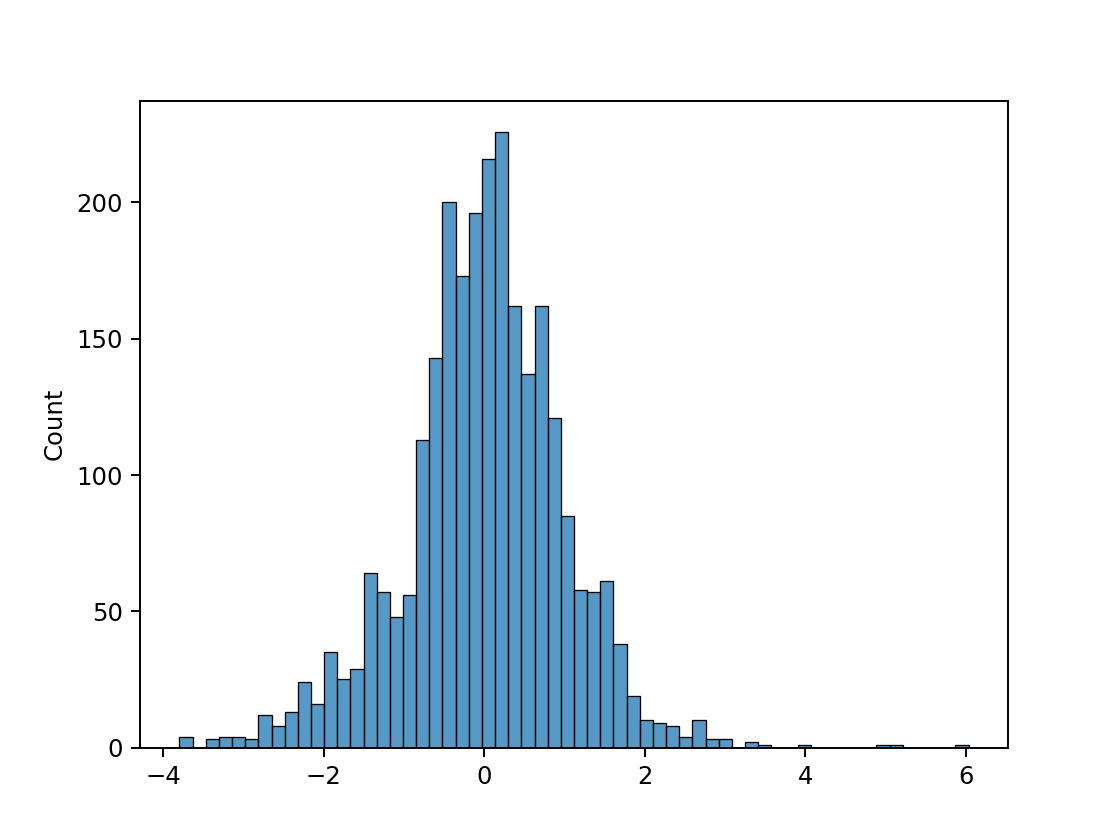

<AxesSubplot:ylabel='Count'>

In [81]:
fig4, ax4 = plt.subplots()
sns.histplot(resid_std, ax=ax4)

In [82]:
wine = pd.read_csv('book_resources/data/wine.csv')
ddf(wine)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Cultivar                      178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

None

,Cultivar,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


<IPython.core.display.Javascript object>


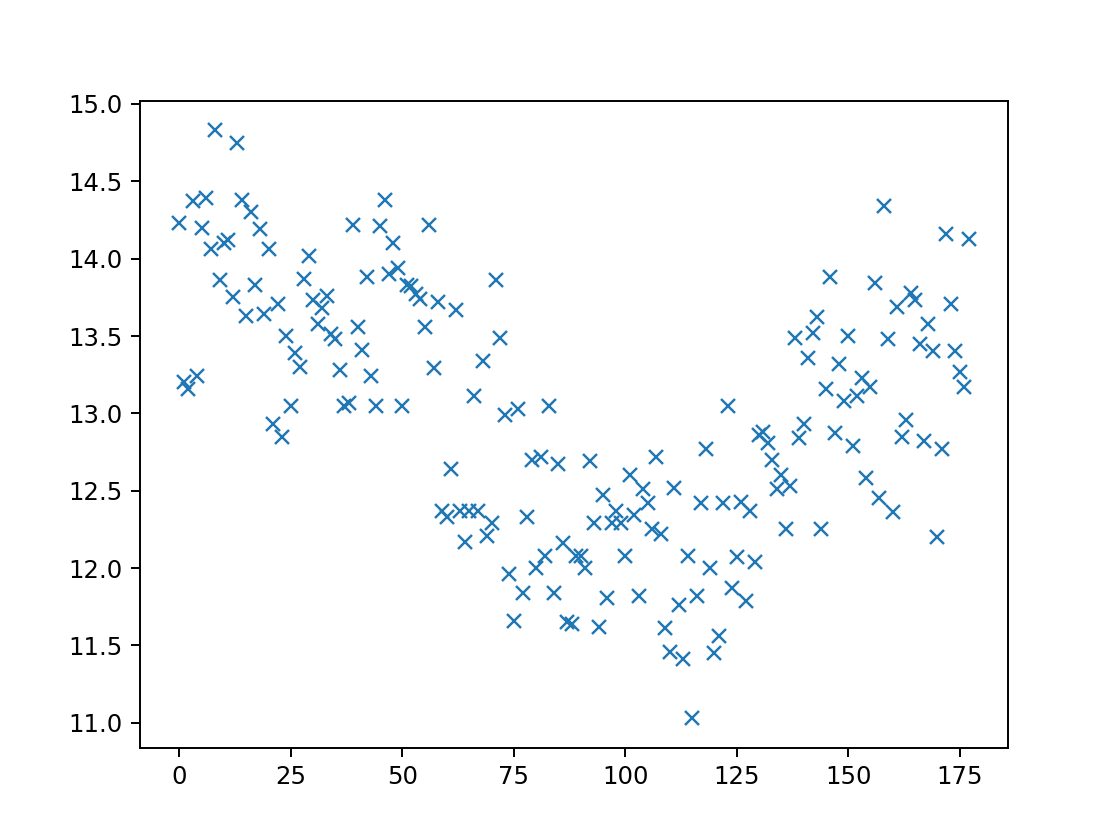

In [89]:
fig5, ax5 = plt.subplots()
ax5.plot('Alcohol', marker='x', linestyle='None', data=wine)

In [90]:
wine = wine.drop('Cultivar', axis=1)

In [93]:
kmeans = KMeans(n_clusters=3, random_state=42).fit(wine.values)
d(kmeans)

----- Type: <class 'sklearn.cluster._kmeans.KMeans'>  Len: N/A  -----


KMeans(n_clusters=3, random_state=42)

In [94]:
print(kmeans)

KMeans(n_clusters=3, random_state=42)


In [95]:
vars(kmeans)

{'n_clusters': 3,
 'init': 'k-means++',
 'max_iter': 300,
 'tol': 0.0001,
 'precompute_distances': 'deprecated',
 'n_init': 10,
 'verbose': 0,
 'random_state': 42,
 'copy_x': True,
 'n_jobs': 'deprecated',
 'algorithm': 'auto',
 'n_features_in_': 13,
 '_n_threads': 8,
 '_n_init': 10,
 '_tol': 0.760254813461904,
 '_algorithm': 'elkan',
 'cluster_centers_': array([[1.29298387e+01, 2.50403226e+00, 2.40806452e+00, 1.98903226e+01,
         1.03596774e+02, 2.11112903e+00, 1.58403226e+00, 3.88387097e-01,
         1.50338710e+00, 5.65032258e+00, 8.83967742e-01, 2.36548387e+00,
         7.28338710e+02],
        [1.38044681e+01, 1.88340426e+00, 2.42617021e+00, 1.70234043e+01,
         1.05510638e+02, 2.86723404e+00, 3.01425532e+00, 2.85319149e-01,
         1.91042553e+00, 5.70255319e+00, 1.07829787e+00, 3.11404255e+00,
         1.19514894e+03],
        [1.25166667e+01, 2.49420290e+00, 2.28855072e+00, 2.08231884e+01,
         9.23478261e+01, 2.07072464e+00, 1.75840580e+00, 3.90144928e-01,
       

In [96]:
a = np.unique(kmeans.labels_, return_counts=True)
d(a)

----- Type: <class 'tuple'>  Len: 2  -----


(array([0, 1, 2]), array([62, 47, 69]))

In [97]:
kmeans.labels_

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 2, 0,
       2, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2])

In [98]:
kmeans_3 = pd.DataFrame(kmeans.labels_, columns=['cluster'])
d(kmeans_3)

----- Type: <class 'pandas.core.frame.DataFrame'>  Len: 178  -----


,cluster
0,1
1,1
2,1
3,1
4,0
...,...
173,0
174,0
175,0
176,0
